This is a notebook for the fiorst part of the analysis.
The first thing we want to do is to include a number of python modules that we will need.

In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

The first thing we want to do now is to is to store our measurement in simple lists:

In [5]:
measurment1 = [27,28,32,39,41,36,36,38,27,40,27,36,32,35,28,32,33,29,31,29,
               29,40,22,32,25,28,25,32,26,25,34,35,27,27,19,34,28,24,40,27,
               27,35,33,26,37,28,32,21,27,36] # at a distance of 6.5cm
# we want this sorted, just because
measurment1.sort()
print(measurment1)
# maybe look at the first and last entry
print("first: ", measurment1[0])
print("last: ", measurment1[-1])
# and get the difference between the two as
spread_m1 =  measurment1[-1] - measurment1[0]
print("The spread is: ", spread_m1)

[19, 21, 22, 24, 25, 25, 25, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 31, 32, 32, 32, 32, 32, 32, 33, 33, 34, 34, 35, 35, 35, 36, 36, 36, 36, 37, 38, 39, 40, 40, 40, 41]
first:  19
last:  41
The spread is:  22


We can also plot the list as a histogram with a binwidth of 5, from 10 to 50 using the matplot hist function

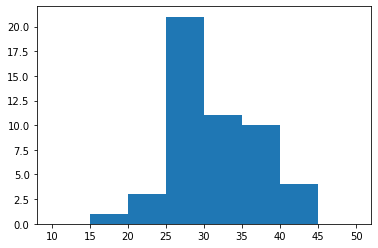

In [19]:
values, bins, patches = plt.hist(measurment1,bins=range(10,51,5)) # take 51, since the upper edge is not included anymore
plt.show()

Now we want to actually know the mean $\left< x_e \right>$, the standart deviation $\sigma$, and the mean squared error (MSE) $\sigma_{s}$ of our distribution.
From the introduction we know the mathematical expressions to be:
\begin{equation}
    \left< x_e \right> = \frac{1}{N} \sum_{i=1}^{N} x_i
\end{equation}

\begin{equation}
    \sigma = \sqrt{ \left< x_e \right>  }
\end{equation}

\begin{equation}
    \sigma_s = \sqrt{\frac{1}{N-1} \sum_{i=1}^{N} \left( x_i - \left< x_e \right> \right)^2 }
\end{equation}

To use them comfortable with our data which we will have stored in lists, we need to write these matmatical expressions as python functions, which have as input a list and return the mean, or expectation value.

In [71]:
def EV (_list):
    _sum = 0.
    for xi in _list:
        _sum += xi
    val = _sum/len(_list)
    return val

In [72]:
print("The mean is: ", EV(measurment1))
print("Taking into account the ", len(measurment1), " entries")

The mean is:  30.74
Taking into account the  50  entries


We should however save this to a variable. The $\sqrt{\left< x_e \right>}$ can then be calculated using the numpy function: `np.sqrt()`

In [73]:
mean_m1 = EV(measurment1)
sigma_m1 = np.sqrt(mean_m1)

The last missing function to define would be the MSE. Can you do this?

In [74]:
def MSE (_mean,_list):
# lets start with calculating the sum over the sqared differences (last part of the equation)
    _sum = 0.
    for xi in _list:
        _sum += (xi - _mean)**2
    _fac = 1/(len(_list)-1)
    val = np.sqrt(_fac*_sum)
    return val

The parameter can then be calculated and printed.

In [75]:
mse_m1 = MSE(mean_m1,measurment1)

print("Mean: ", mse_m1)

Mean:  5.317702434667954


With the $\left< x_e \right>$ and the $\sigma$ you can now define a list, that defines the bin edges of the 6 class $\chi^2$ distribution

In [76]:
ax_chi2_m1 = [mean_m1-3*sigma_m1, mean_m1-2*sigma_m1, mean_m1-sigma_m1, mean_m1,mean_m1+sigma_m1,mean_m1+2*sigma_m1,mean_m1+3*sigma_m1]

and now we can plot the measured distribution in the 6 classes of our $\chi^2$ test with:

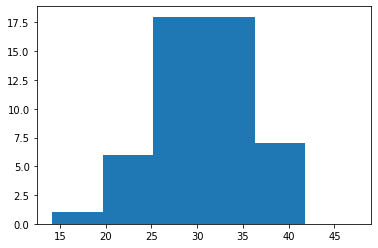

In [79]:
values_m1, bins_m1, patches = plt.hist(measurment1,ax_chi2_m1)
plt.show()

array([ 1.,  6., 18., 18.,  7.,  0.])